<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Tarea Módulo 03

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_homework_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Daniela Paz Díaz Mora

__Rol__: 201710003-6

**Indicaciones**: Para el **Ejercicio 1** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente, en ambos casos cada gráfico debe tener elementos mínimos como:
- Título
- Nombre de los ejes en formato _amigable_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `cost_of_living_index` se espera que el eje del gráfico tenga por nombre `Índice de Costo de Vida`.
- Colores adecuados al tipo de datos.
- Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.

Para el **Ejercicio 2** es obligación utilizar `altair`.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from vega_datasets import data
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.themes.enable('opaque')

%matplotlib inline

## 1. Índices de Costos de Vida

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [2]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[2]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,2015,1,"Hamilton, Bermuda",163.55,120.02,142.28,191.71,132.91,69.79
1,2015,2,"Geneva, Switzerland",145.18,81.46,114.05,161.14,141.23,130.21
2,2015,3,"Caracas, Venezuela",141.41,60.46,101.86,155.16,122.27,9.73
3,2015,4,"Zurich, Switzerland",141.06,66.39,104.57,148.56,146.90,133.91
4,2015,5,"Tromso, Norway",131.45,55.80,94.48,127.72,137.08,132.41


### Ejercicio 1.1 (5 pts)

Explique lo que se hizo en la celda anterior detalladamente.

-Se crea un data frame, life_cost talque

-Recorre la lista years creada en la primera linea

-Extrae el dataframe que corresponde al año de la iteración en el enlace

-los nombres de las columnas quedan en minusculas y además los espacios son remplazados por '_'

-Se asigna rank que corresponde al indice+1 talque (rank+1)

-Luego los indices corresponden al rango

-Se concatenan los dataframes 

-Renombra los indices por 'year' y 'rank'

-Se resetea los indices



### Ejercicio 1.2 (10 pts)

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

In [3]:
cost_years=life_cost.groupby('year')
cost_years.get_group(2020)

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
2407,2020,1,"Zurich, Switzerland",128.29,61.66,96.42,127.96,124.73,126.90
2408,2020,2,"Basel, Switzerland",125.54,45.76,87.38,124.99,123.11,121.47
2409,2020,3,"Lausanne, Switzerland",124.02,50.64,88.92,127.26,123.61,110.52
2410,2020,4,"Geneva, Switzerland",118.98,68.47,94.82,112.88,119.58,111.16
2411,2020,5,"Bern, Switzerland",116.03,40.52,79.91,107.58,115.56,131.89
...,...,...,...,...,...,...,...,...,...
2842,2020,436,"Karachi, Pakistan",23.07,4.57,14.22,20.03,19.20,29.27
2843,2020,437,"Islamabad, Pakistan",22.95,6.00,14.84,22.23,17.22,30.28
2844,2020,438,"Vijayawada, India",22.31,5.09,14.07,23.04,13.19,47.38
2845,2020,439,"Visakhapatnam, India",21.09,4.11,12.97,21.43,13.52,52.04


Text(0.5, 1.0, 'Indice de Costo de vida (2020) [%]')

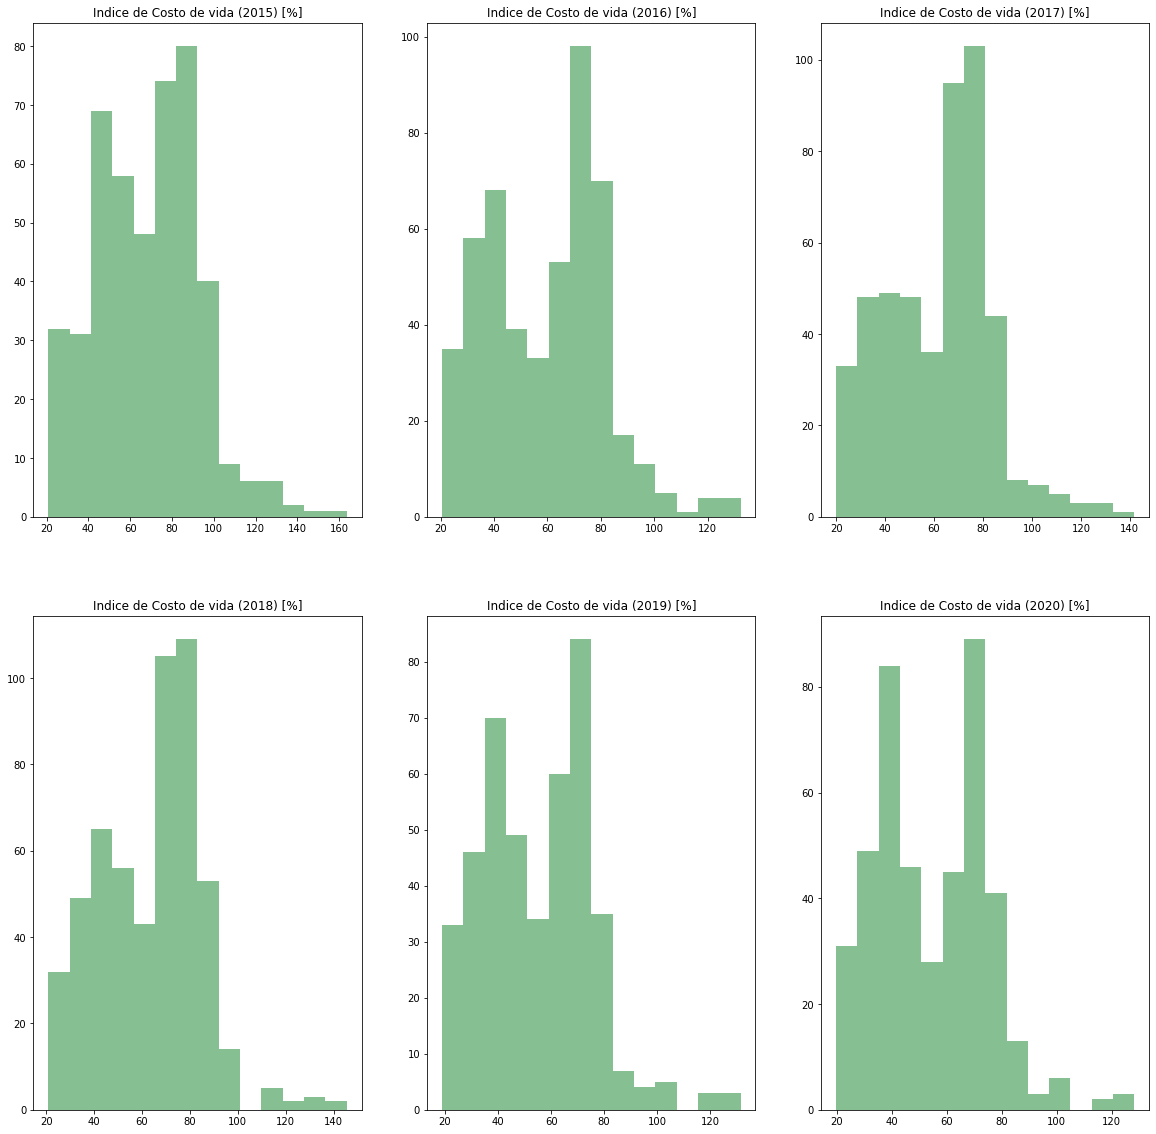

In [4]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 3, 1)
plt.hist(cost_years.get_group(2015)['cost_of_living_index'],bins=14,color='#86bf91')
plt.title('Indice de Costo de vida (2015) [%]')

plt.subplot(2, 3, 2)
plt.hist(cost_years.get_group(2016)['cost_of_living_index'],bins=14,color='#86bf91')
plt.title('Indice de Costo de vida (2016) [%]')

plt.subplot(2, 3, 3)
plt.hist(cost_years.get_group(2017)['cost_of_living_index'],bins=14,color='#86bf91')
plt.title('Indice de Costo de vida (2017) [%]')

plt.subplot(2, 3, 4)
plt.hist(cost_years.get_group(2018)['cost_of_living_index'],bins=14,color='#86bf91')
plt.title('Indice de Costo de vida (2018) [%]')

plt.subplot(2, 3, 5)
plt.hist(cost_years.get_group(2019)['cost_of_living_index'],bins=14,color='#86bf91')
plt.title('Indice de Costo de vida (2019) [%]')

plt.subplot(2, 3, 6)
plt.hist(cost_years.get_group(2020)['cost_of_living_index'],bins=14,color='#86bf91')
plt.title('Indice de Costo de vida (2020) [%]')



Se puede concluir a partir de todos los histogramas, que la cantidad de ciudades que superan el Indice de Costo de Vida de Nueva York son pocas en comparación a la cantidad estudiadas en el dataframe ya que la cola derecha del histograma es pesada.

El intervalo modal del histograma para divisiones de 14 grupos respecto al porcentaje varia entre 70% y 90% aproximadamente respecto al indice de costo de vida de Nueva York 


### Ejercicio 1.3 ( pts)

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

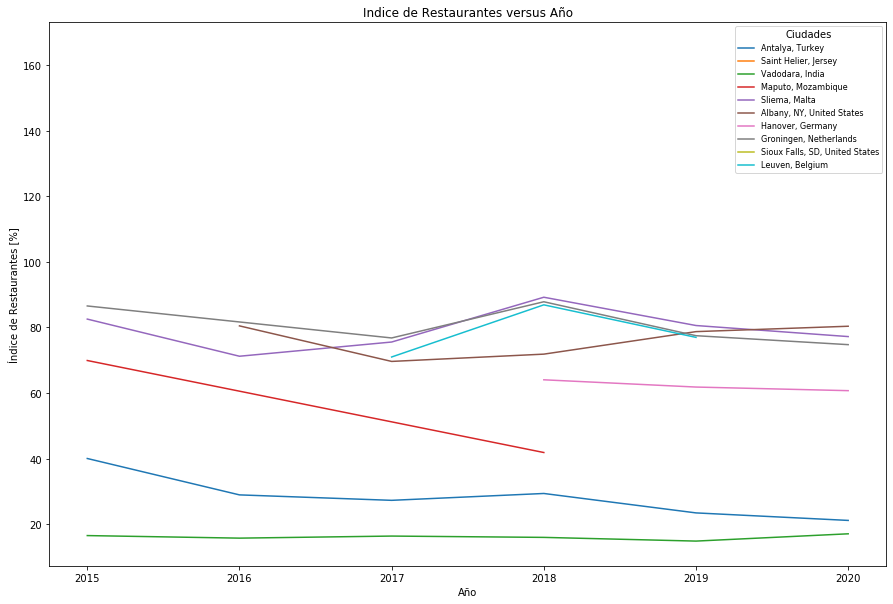

In [5]:
rol_seed = 201710003  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values
city_index=life_cost.groupby('city')



#plot
plt.figure(figsize=(15,10))

for i in my_cities:
    x= city_index.get_group(i)['year'].tolist()
    y= city_index.get_group(i)['restaurant_price_index'].tolist()
    plt.plot(x, y,label=i)
    plt.xlabel('Año')
    plt.ylabel('Índice de Restaurantes [%]')
    plt.title('Indice de Restaurantes versus Año')

plt.legend(ncol=1,title='Ciudades',fontsize=8)
    

Primero cabe recalcar la ausencia de datos en ciertos años para algunas ciudades, para el caso de my_cities, como ejemplo, Acra y Bellevue no tienen registros del índice de restaurantes para el año 2018,2020 y (2015-2017,2019) respectivamente.

Solamente las ciudades Trondheim, San Jose, Phuket, Rijeca y Belgrado tienen registros del indice de restaurantes para todos los años.

De este grafico se podria pensar que los indices de restaurantes no tienen gran diferencias entre años, es decir si hay dos ciudades que tienen registros del indice de restaurante para cierto año muy distinto probablemente al variar los años de registro se mantenga la tendencia, pero, no es posible afirmar algo asi por la falta de datos y el estudio estadistico pertinente.

Por otra parte entre las ciudades que tienen todos los registros, Trondheim y Phuket son las ciudades con mayor y menor indice de restaurante respectivamente (se mantiene a través de todos los años).

No se grafican todas las ciudades ya que el grafico se llenaria de lineas, tal que su visuaalización e interpretación seria imposible de realizar


### Ejercicio 1.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [6]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

In [7]:
#funcion promedio para una lista,(no env)

def mean_list(a):
    mean=sum(a)/len(a)
    return mean

In [8]:
n=len(redable_index_names.values())
#se crea una matriz de ceros de las dimensiones necesarias
ind_mean=np.zeros((10,6))

#se rellena la matriz con los promedios respectivos
a=0
for x in my_cities:
    b=0
    for y in redable_index_names.keys():
        list_index=city_index.get_group(x)[y].tolist()
        mean=mean_list(list_index)
        ind_mean[a][b]=mean
        b=b+1
    a=a+1
    
    

In [9]:
temp=[]
for x in redable_index_names.values():
        temp.append(x)
index_names=np.array(temp)

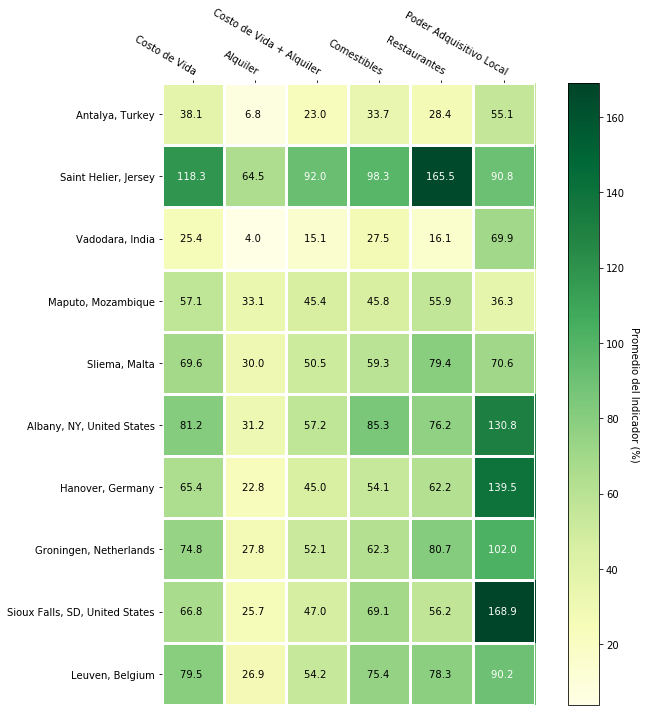

In [10]:
from mpl_heatmap import heatmap, annotate_heatmap
fig, ax = plt.subplots(figsize=(10, 10))

im, cbar = heatmap(ind_mean, my_cities, index_names, ax=ax,
                   cmap="YlGn", cbarlabel="Promedio del Indicador (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} ")

fig.tight_layout()
plt.show()

np.array(redable_index_names.values())

### Ejercicio 1.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [11]:
life_cost['city']

0               Hamilton, Bermuda
1             Geneva, Switzerland
2              Caracas, Venezuela
3             Zurich, Switzerland
4                  Tromso, Norway
                  ...            
2842            Karachi, Pakistan
2843          Islamabad, Pakistan
2844            Vijayawada, India
2845         Visakhapatnam, India
2846    Thiruvananthapuram, India
Name: city, Length: 2847, dtype: object

In [12]:
life_cost.head()
#Extraigo las ciudades
countries=[]
for x in life_cost['city'].tolist():
    lista=x.split(', ')
    countries.append(lista[-1])
#se agrega la columna al dataframe
life_cost['country']=countries
life_cost.head()

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index,country
0,2015,1,"Hamilton, Bermuda",163.55,120.02,142.28,191.71,132.91,69.79,Bermuda
1,2015,2,"Geneva, Switzerland",145.18,81.46,114.05,161.14,141.23,130.21,Switzerland
2,2015,3,"Caracas, Venezuela",141.41,60.46,101.86,155.16,122.27,9.73,Venezuela
3,2015,4,"Zurich, Switzerland",141.06,66.39,104.57,148.56,146.90,133.91,Switzerland
4,2015,5,"Tromso, Norway",131.45,55.80,94.48,127.72,137.08,132.41,Norway


In [13]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values

#creo diccionario traductor
keys=life_cost.query("year == 2020")["country"].drop_duplicates().tolist()
values=['Suiza', 'Venezuela', 'Noruega', 'Australia', 'Reino Unido', 'Canadá', 'Dinamarca', 'Islandia', 'Estados Unidos', 'Francia', 'Italia', 'Nueva Zelanda', 'Singapur',
 'Irlanda', 'Finlandia', 'Países Bajos', 'Bélgica', 'Luxemburgo', 'Suecia', 'Israel', 'Japón', 'Alemania', 'Corea del Sur', 'Chipre', 'Puerto Rico', 'Hong Kong', 'Austria', 'Rusia', 'Argentina'
 'Katar', 'Arabia Saudita', 'España', 'Jamaica', 'Grecia', 'Emiratos Árabes Unidos', 'Líbano', 'Malta', 'Uruguay', 'Taiwán', 'Eslovenia', 'Estonia', 'Camboya', 'Costa Rica', 'Irak', 'Tailandia',
 'Jordán', 'Nigeria', 'Brasil', 'Panamá', 'Azerbaiyán', 'Croacia', 'República Dominicana', 'Portugal', 'Uzbekistán', 'Omán', 'Letonia',
 'Bahrein', 'China', 'Kazajstán', 'Malasia', 'Chile', 'Perú', 'Eslovaquia', 'Kenia', 'Namibia', 'Lituania', 'El Salvador', 'Pavo', 'Ecuador', 'Mongolia', 'Guatemala', 'Bielorrusia',
 'Hungría', 'Filipinas', 'Republica checa', 'Sudáfrica', 'Montenegro', 'Corrí', 'Polonia', 'México', 'Serbia', 'Ucrania', 'Bulgaria', 'Vietnam', 'Rumania', 'Indonesia', 'Bosnia y Herzegovina', 'Albania', 'Sri Lanka', 'Kirguistán',
 'Colombia', 'Marruecos', 'Macedonia', 'Armenia', 'Kosovo (territorio en disputa)', 'Bangladesh', 'Siria', 'Georgia', 'Egipto', 'Argelia', 'Túnez', 'Pakistán', 'Moldavia', 'India', 'Nepal', 'Kuwait', 'Paraguay', 'Surinam']
dic_country = dict(zip(keys, values))

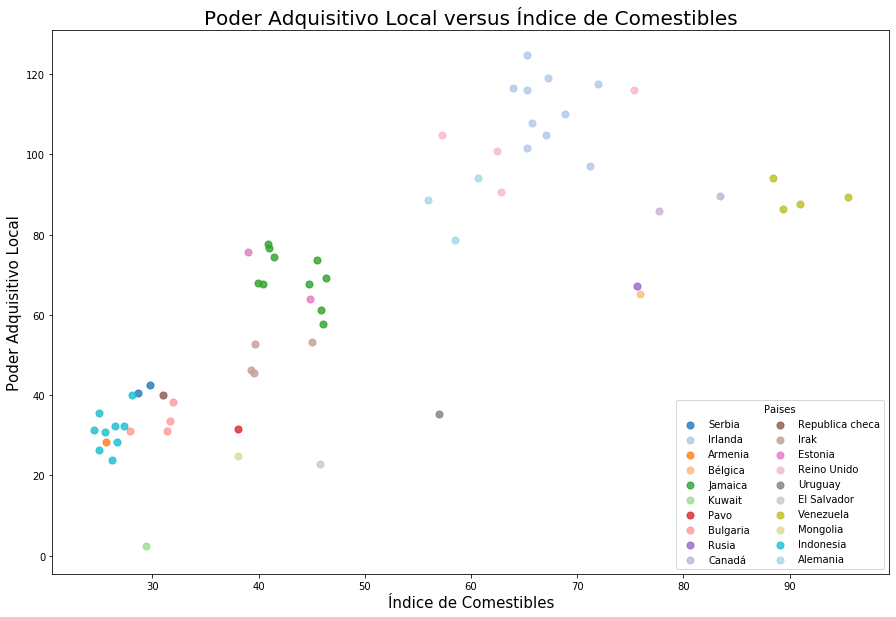

In [14]:
temp_df_=life_cost.groupby('year')
df_labels=temp_df_.get_group(2020).groupby('country')


plt.figure(figsize=(15,10))

df_labels.get_group('Mexico')
colors = iter([plt.cm.tab20(i) for i in range(20)])

for i in np.arange(0,20):
    x=df_labels.get_group(my_countries[i])['groceries_index'].tolist()
    y=df_labels.get_group(my_countries[i])['local_purchasing_power_index'].tolist()
    plt.scatter(x, y, c=[next(colors)],label=dic_country[my_countries[i]],alpha=0.8,s=50)
plt.xlabel('Índice de Comestibles', fontsize=15)
plt.ylabel('Poder Adquisitivo Local', fontsize=15)
plt.title('Poder Adquisitivo Local versus Índice de Comestibles',fontsize=20)
plt.legend(loc='lower right',title='Paises',ncol=2)

¿Qué comentarios puedes entregar al comparar los países seleccionados?

Pareciera a simple vista haber una relación positiva entre el Indice de Comestibles y el Poder Adquisitivo local, se aprecian 2 clusters, uno entre [0,60] en el eje del indice de Comestibles y el otro entre [60,90]

### Ejercicio 1.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [15]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head()

,country,continent
0,Andorra,EU
1,United Arab Emirates,AS
2,Afghanistan,AS
3,Antigua and Barbuda,NA
4,Anguilla,NA


In [16]:
life_cost=pd.merge(life_cost,countries,how='inner',on='country')
life_cost

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index,country,continent
0,2015,1,"Hamilton, Bermuda",163.55,120.02,142.28,191.71,132.91,69.79,Bermuda,NA
1,2016,1,"Hamilton, Bermuda",132.32,120.87,126.82,128.62,120.35,118.87,Bermuda,NA
2,2017,1,"Hamilton, Bermuda",141.84,113.35,128.19,131.79,151.38,96.54,Bermuda,NA
3,2018,1,"Hamilton, Bermuda",145.43,110.87,128.76,143.47,158.75,112.26,Bermuda,NA
4,2015,2,"Geneva, Switzerland",145.18,81.46,114.05,161.14,141.23,130.21,Switzerland,EU
...,...,...,...,...,...,...,...,...,...,...,...
2842,2019,320,"La Paz, Bolivia",38.63,12.04,25.86,32.38,33.90,38.30,Bolivia,SA
2843,2019,322,"Santa Cruz, Bolivia",38.52,12.21,25.89,31.39,28.10,52.16,Bolivia,SA
2844,2019,215,"Port of Spain, Trinidad And Tobago",55.81,19.16,38.21,55.72,49.60,54.03,Trinidad And Tobago,NA
2845,2019,247,"Suva, Fiji",49.40,31.61,40.86,55.39,36.23,32.34,Fiji,OC


A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

In [17]:
life_temp=life_cost.groupby('year')
def xy_plot(ax,x,y):
    ax.scatter(life_temp.get_group(2020)[x],life_temp.get_group(2020)[y])
    ax.set_xlabel(x, fontsize=5)
    ax.set_ylabel(y, fontsize=5)
    ax.set_title('Title', fontsize=2)
    


In [18]:
index=['cost_of_living_index', 'rent_index','cost_of_living_plus_rent_index', 'groceries_index','restaurant_price_index', 'local_purchasing_power_index']


/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


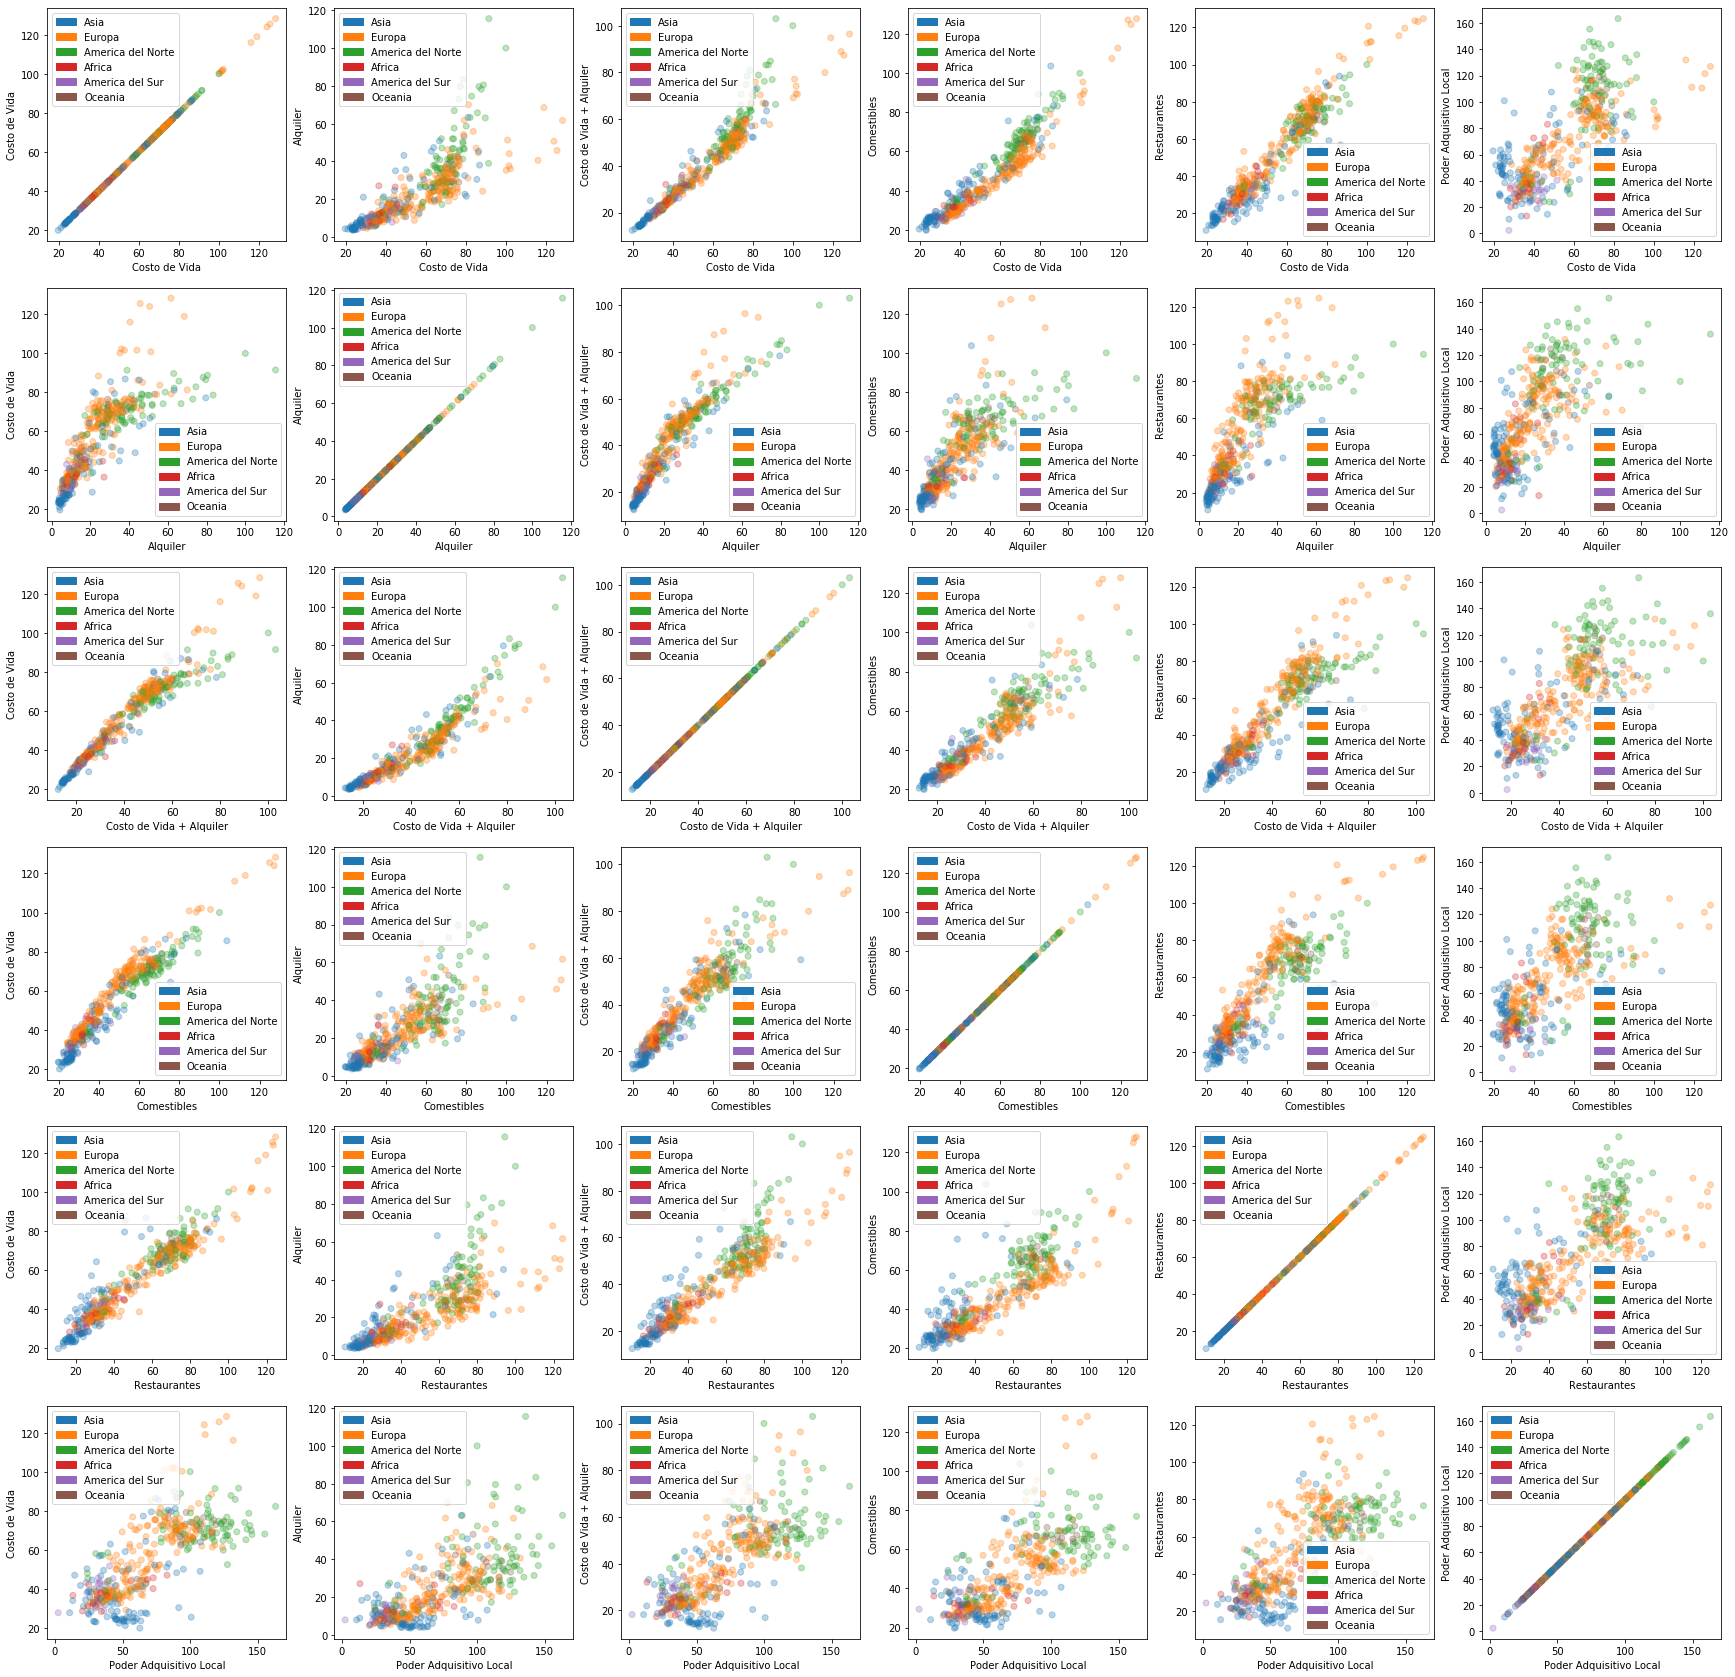

In [19]:
import matplotlib.patches as mpatches

#Sea crea 36 graficos vacios
fig, ax = plt.subplots(nrows=6, ncols=6,figsize=(30,30))

#dataframe auxiliar que solo tiene los datos del año 2020
df_labels=life_temp.get_group(2020)


#diccionario de color asignado para cada continente
col_dict={'AS':'tab:blue', 'EU':'tab:orange', 'NA':'tab:green', 'AF':'tab:red', 'SA': 'tab:purple', 'OC':'tab:brown'}

#creacion de columna nueva en el df auxiliar correspondiente al color de cada punto
df_labels["colour_column"] = df_labels["continent"].map(col_dict)


for x in range(6):
    for y in range(6):
        scatter=ax[x,y].scatter(df_labels[index[x]],df_labels[index[y]],c=df_labels['colour_column'],alpha=0.3)
        ax[x,y].set_xlabel(redable_index_names[index[x]])
        ax[x,y].set_ylabel(redable_index_names[index[y]])
        c1= mpatches.Patch(color='tab:blue', label='Asia')
        c2= mpatches.Patch(color='tab:orange', label='Europa')
        c3= mpatches.Patch(color='tab:green', label='America del Norte')
        c4= mpatches.Patch(color='tab:red', label='Africa')
        c5= mpatches.Patch(color='tab:purple', label='America del Sur')
        c6= mpatches.Patch(color='tab:brown', label='Oceania')
        
        ax[x,y].legend(handles=[c1,c2,c3,c4,c5,c6])
        #ax[x,y].add_artist(l1)


## 2. Películas

Este ejercicio utilizará el dataset de películas que viene pre-cargado en `vega_datasets`. Es intereasnte pues posee columnas de distintos tipos y una cantidad relativamente decente de registros.

In [20]:
# data.movies?

In [21]:
movies_raw = data.movies()
movies_raw.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


### Ejercicio 2.1

Pre-procesamiento:

Crea un dataframe llamado `movies` tal que sea igual a `movies_raw` salvo que la columna `Release_Date` debes convertrla a tipo `datetime` (recuerda utilizar `pd.to_datetime`).

Este conjunto de datos posee algunos errores, a medida que vayas avanzando en el desarrollo de estas visualizaciones te irás dando cuenta de ellos y __debes solucionarlos!__.

A modo de ejemplo, hay películas que tienen fechas de estreno incorrectas, a cualquiera que sea del año 2020 en adelante hay que restarle 100 años. Ver _King Kong (1933)_ y su fecha de estreno el año 2033.

In [22]:
## Arreglar estrenos a partir del año 2020 
a=movies_raw['Release_Date'][0]
movies_raw['Release_Date']=pd.to_datetime(movies_raw['Release_Date'])
movies_raw

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,1998-06-12,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,1998-08-07,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,1998-08-28,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,1998-09-11,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,1998-10-09,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,2008-10-31,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,2007-03-02,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,2006-08-11,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,2005-10-28,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


In [23]:
## Generar dataframe movies a partir de movies_raw
movies=movies_raw
movies['Release_Date'] = movies_raw['Release_Date'].apply(lambda x: x-pd.DateOffset(years=100) if x> pd.to_datetime('2020-01-01') else x)


Rellena los registros nulos de la columna `Major_Genre` con el valor `Unknown`.

In [24]:
movies['Major_Genre'].fillna('Unknow')

0                  Unknow
1                   Drama
2                  Comedy
3                  Comedy
4                   Drama
              ...        
3196               Comedy
3197    Thriller/Suspense
3198            Adventure
3199            Adventure
3200            Adventure
Name: Major_Genre, Length: 3201, dtype: object

Para que todos los gráficos de aquí en adelante funcionen bien vamos a eliminar los registros/filas/películas que tengan algún elemento nulo dentro de las siguientes columnas:

- `US_Gross`
- `Worldwide_Gross`
- `Production_Budget`
- `Release_Date`
- `IMDB_Rating`

In [25]:
movies.dropna(subset=['US_Gross','Worldwide_Gross','Production_Budget','Release_Date','IMDB_Rating'],axis=0)

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,1998-06-12,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,1998-08-07,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,1998-08-28,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
4,Slam,1009819.0,1087521.0,NaN,1000000.0,1998-10-09,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
6,Following,44705.0,44705.0,NaN,6000.0,1999-04-04,R,NaN,Zeitgeist,None,None,None,Christopher Nolan,NaN,7.7,15133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,Zombieland,75590286.0,98690286.0,28281155.0,23600000.0,2009-10-02,R,87.0,Sony Pictures,Original Screenplay,Comedy,Fantasy,Ruben Fleischer,89.0,7.8,81629.0
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,2008-10-31,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,2006-08-11,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,2005-10-28,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


### Ejercicio 2.2

Define la función `movies_chart` tal que: 

- Los argumentos sean `year`, `imdb_rating`, `genre`, `budget` y `ww_gross` con valor por defecto `None`. 
    * Cada uno de estos argumentos es una tupla de dos elementos, que corresponden a un valor mínimo y máximo, salvo `genre` que es una tupla de `strings`. 
- Se define el dataframe `data` que es una copia del dataframe `movies`.
- Luego se debe filtrar el dataframe `data` de la siguiente forma:
    * `year` filtra la columna `Release_Date` tal que $year[0] \leq year(Release_Date) \leq year[1]$.
    * `imdb_rating` filtra la columna `IMDB_Rating` tal que $imdb_rating[0] \leq IMDB_Rating \leq imdb_rating[1]$.
    * `genre` filtra la columna `Major_Genre` tal que $genre[0] \in Major\_Genre$.
    * `budget` filtra la columna `Production_Budget` tal que $budget[0] \leq Production_Budget \leq budget[1]$.
    * `ww_gross` filtra la columna `Worldwide_Gross` tal que $ww_gross[0] \leq Worldwide_Gross \leq ww_gross[1]$.
- Se define la variables `chart` que corresponde a un `alt.Chart` que debe:
    * Ser un _scatter plot_ con opacidad `0.4`.
    * El eje horizontal corresponde al presupuesto de producción.
    * El eje vertical corresponde a lo recaudado mundialmente.
    * El color se corresponde con el género principal de la película.
    * El tamaño es proporcional al rating de IMDB.
    * Cada punto debe mostrar un tooltip con:
        - Título de la película.
        - Fecha de lanzamiento.
        - Director.
        - Fuente.
        - Distribuidor.
        - Presupuesto de producción.
        - Recaudación mundial.
        - Género principal.
        - Rating IMDB.
    * El gráfico debe ser interactivo.
- Finalmente, hacer un `display` del gráfico `chart`.
- Retorna `None`.

In [26]:
def movies_chart(year=None, imdb_rating=None, genre=None, budget=None, ww_gross=None):
 
    data = movies.copy()
    
    # Year
    if year is not None:
        ## FIX ME PLEASE #
        years=np.arange(year[0],year[1]+1)
        data=data.loc[lambda x: pd.DatetimeIndex(x['Release_Date']).year.isin(years)]
        
    
    # IMDB
    if imdb_rating is not None:
        ## FIX ME PLEASE ##
        data=data.loc[lambda x: x['IMDB_Rating'].between(imdb_rating[0],imdb_rating[1],inclusive=True)]
          
    # Genre
    if genre is not None:
        data=data.loc[lambda x: x.Major_Genre.isin(genre)]
        
    # Budget
    if budget is not None:
        data=data.loc[lambda x: x['Production_Budget'].between(budget[0],budget[1],inclusive=True)]

    # Worldwide Gross
    if ww_gross is not None:
        data=data.loc[lambda x: x['Worldwide_Gross'].between(ww_gross[0],ww_gross[1],inclusive=True)]
    
    ## Chart
    chart = alt.Chart(data).mark_circle(opacity=0.4).encode(
        x=alt.X('Production_Budget:Q', title='Presupuesto de producción'),
        y=alt.Y('Worldwide_Gross:Q', title='Recaudación mundial'),
        color=alt.Color('Major_Genre:N', title='Género principal', scale=alt.Scale(scheme='category20')),
        size=alt.Size('IMDB_Rating:O', legend=None),
        tooltip=[
               alt.Tooltip('Title:N', title='Título'),
               alt.Tooltip('Release_Date', type='temporal', title='Fecha de lanzamiento'),
               alt.Tooltip('Director:N', title='Director(a)'),
               alt.Tooltip('Source:N', title='Fuente'),
               alt.Tooltip('Distributor:N', title='Distribuidor'),
               alt.Tooltip('Production_Budget:Q', title='Presupuesto de producción'),
               alt.Tooltip('Worldwide_Gross:Q', title='Recaudación mundial'),
               alt.Tooltip('Major_Genre:N', title='Género principal'),
               alt.Tooltip('IMDB_Rating:Q', title='Rating IMDB')
                   ]
    ).interactive()

    display(chart)
    return None

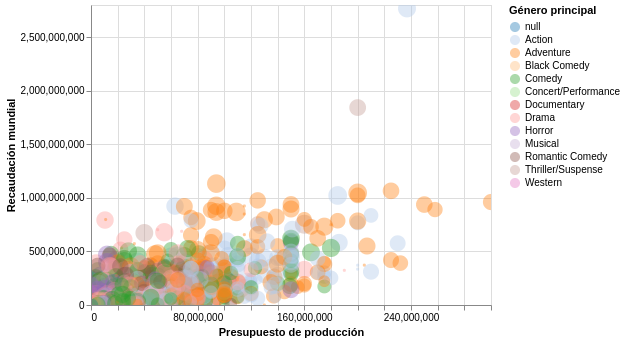

In [27]:
movies_chart()

### Ejercicio 2.3

Generar widgets para cada uno de los argumentos de la función `movies_chart`, los nombres sugeridos son:

- `year_widget` para el argumente `year`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `imdb_widget` para el argumente `imdb`, debe ser un `widget.FloatRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 0.1 unidad.
- `genre_widget` para el argumente `genre`, debe ser un `widget.SelectMultiple`, por defecto deben venir selecionados todos los géneros..
- `budget_widget` para el argumente `budget`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `ww_gross_widget` para el argumente `ww_gross`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.

Todo widget debe tener un valor adecuado para el argumento `description` y configurar el argumento `continuous_update = False`.

In [28]:
year_widget = widgets.IntRangeSlider(
    value=[movies['Release_Date'].min().year, movies['Release_Date'].max().year],
    min=movies['Release_Date'].min().year,
    max=movies['Release_Date'].max().year,
    step=1,
    description='Día de lanzamiento:',
    continuous_update=True
)

imdb_widget = widgets.FloatRangeSlider(
    value=[movies['IMDB_Rating'].min(), movies['IMDB_Rating'].max()],
    min=movies['IMDB_Rating'].min(),
    max=movies['IMDB_Rating'].max(),
    step=0.1,
    description='Ranking IMDB'
)

genre_widget = widgets.SelectMultiple(
    options=movies['Major_Genre'].unique().tolist(),
    value=movies['Major_Genre'].unique().tolist(),
    description='Género principal'
)

budget_widget = widgets.IntRangeSlider(
    value=[movies['Production_Budget'].min(), movies['Production_Budget'].max()],
    min=movies['Production_Budget'].min(),
    max=movies['Production_Budget'].max(),
    step=1,
    description='Presupuesto de producción'
)

ww_gross_widget = widgets.IntRangeSlider(
    value=[movies['Worldwide_Gross'].min(), movies['Worldwide_Gross'].max()],
    min=movies['Worldwide_Gross'].min(),
    max=movies['Worldwide_Gross'].max(),
    step=1,
    description='Recaudación mundial'
)

Finalmente, haciendo uso de `interactive`, la función `movies_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de las películas.

Respira profundo y explora tu creación!

In [29]:
movies_dashboard = interactive(
    movies_chart,
    year=year_widget,
    imdb_rating=imdb_widget,
    genre=genre_widget,
    budget=budget_widget,
    ww_gross=ww_gross_widget
)
movies_dashboard

interactive(children=(IntRangeSlider(value=(1920, 2016), description='Día de lanzamiento:', max=2016, min=1920…